# Análise dos erros 

As análises permitem entender se os erros do modelo são aleatórios e independentes ou se há padrões que indicam a necessidade de ajustes no modelo.

**1. Distribuição dos Erros (Resíduos):**


**Média próxima de zero:** Os resíduos devem ter uma média próxima de zero, o que indica que o modelo não está sistematicamente subestimando ou superestimando.


**Distribuição normal:** Se os resíduos seguirem uma distribuição aproximadamente normal, é um bom sinal de que o modelo está capturando corretamente a tendência e a sazonalidade dos dados.

**2. Heterocedasticidade:**

Verificar se há heterocedasticidade nos erros, ou seja, se a variância dos resíduos é constante ao longo do tempo. Se houver padrões na variação dos resíduos (aumento ou diminuição da variância), o modelo pode estar a subestimar ou superestimar a incerteza em certas partes da série.

Utilizamos o teste de Breusch-Pagan ou gráficos de resíduos para verificar a heterocedasticidade.

**3. Autocorrelação dos Resíduos:**

**Autocorrelação:**

O erro residual não deve ser autocorrelacionado, ou seja, não deve haver padrões nos erros ao longo do tempo. Se existir autocorrelação, o modelo não está a capturar corretamente todas as dinâmicas da série temporal.
Vamos aplicar o teste de Ljung-Box para avaliar se há correlação significativa nos resíduos ao longo do tempo.

**4. Análise da Estacionaridade dos Resíduos:**
Verificar se os resíduos são estacionários. A não estacionaridade pode indicar que o modelo não capturou bem as tendências ou sazonalidades.
Utilizar o teste de Dickey-Fuller aumentado (ADF) ou o teste KPSS para avaliar a estacionaridade dos resíduos.

**5. Outliers nos Resíduos:**

Verificar se há outliers nos resíduos, o que pode indicar que o modelo não está a capturar eventos esporádicos ou anomalias na série temporal.
Identificar outliers através de boxplots.

**6. Gráficos dos Erros ao Longo do Tempo:**

Plotar os erros ao longo do tempo para identificar se há padrões cíclicos ou picos inesperados. Um gráfico de resíduos que apresenta picos em certos períodos pode indicar sazonalidade ou outros padrões que o modelo não está a capturar adequadamente.

**7. Análise do Bias do Modelo**

Avaliar se há bias no modelo, ou seja, se o modelo tende a subestimar ou superestimar consistentemente as previsões em certas partes da série temporal (por exemplo, durante períodos de tendência ascendente ou descendente).

**8. Análise da Sazonalidade e Tendência**

Verificar se os resíduos não apresentam padrões de sazonalidade ou tendência não capturados pelo modelo. Se o padrão dos resíduos mostrar que ainda existem tendências ou ciclos sazonais, o modelo pode precisar de ajustes para capturá-los melhor.

**9. Testes de Normalidade**

Aplicar testes de teste de Shapiro-Wilk ou teste de Kolmogorov-Smirnov para verificar a normalidade dos resíduos, além da análise gráfica (QQ-plot).

# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, adfuller, q_stat
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.tsa.api import SimpleExpSmoothing
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Simulação dos erros

In [2]:
np.random.seed(42)
n = 1000  
errors = np.random.normal(0, 1, n)  

df = pd.DataFrame({"Erros": errors})

# Plot dos erros

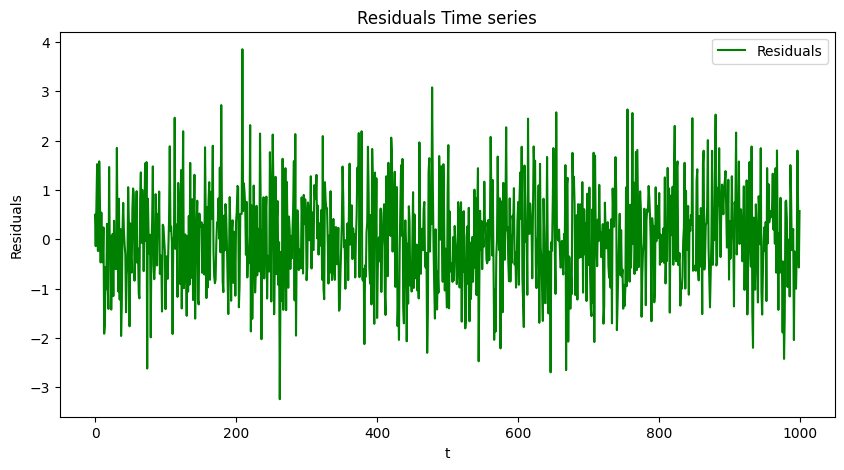

In [3]:
# Plot da série temporal dos erros
plt.figure(figsize=(10, 5))
plt.plot(df['Erros'], label='Residuals', color='green')
plt.title('Residuals Time series')
plt.xlabel('t')
plt.ylabel('Residuals')
plt.legend()
plt.show()

**Comentário:** 8yghuijokhgyui

# 1. Análise da Distribuição dos Erros

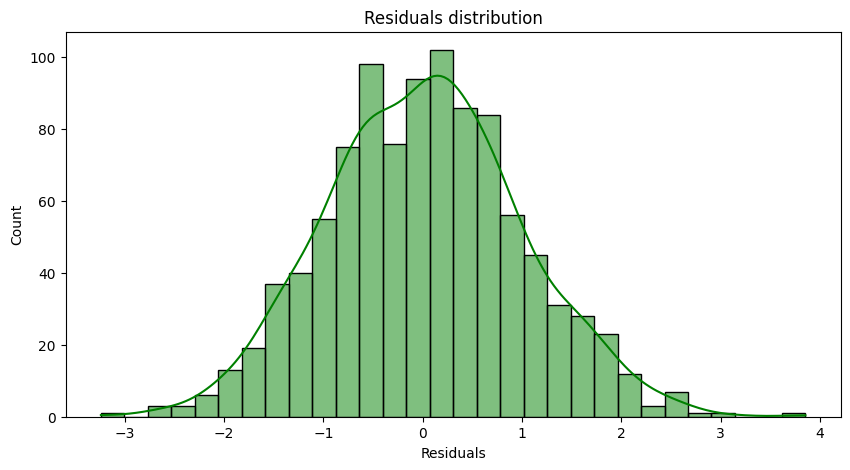

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Erros'], kde=True, color='green', bins=30)
plt.xlabel('Residuals')
plt.title('Residuals distribution')
plt.show()

# Teste de normalidade

In [5]:
shapiro_test = stats.shapiro(df['Erros'])
print(f"Shapiro-Wilk Normality test: p-value={shapiro_test.pvalue:.4f}")

Shapiro-Wilk Normality test: p-value=0.6265


Com base no teste de Shapiro-Wilk (p-value=0.6265 > 0.05), podemos concluir que os erros do modelo seguem uma **distribuição aproximadamente normal, o que sugere que o modelo está bem ajustado nesse aspecto, já que, em muitos modelos, a normalidade dos erros é uma suposição desejada.**

# 2. Heterocedasticidade

In [6]:
from statsmodels.tools.tools import add_constant

X = np.arange(1, n + 1)
X_with_constant = add_constant(X)

# Teste de Breusch-Pagan
Y = df['Erros']
_, pval, __, f_pval = het_breuschpagan(Y, X_with_constant)
print(f"Breusch-Pagan Teste de Heterocedasticidade: p-value={pval:.4f}, F-test p-value={f_pval:.4f}")

Breusch-Pagan Teste de Heterocedasticidade: p-value=0.8049, F-test p-value=0.8052


Com base nos resultados do teste de Breusch-Pagan, podemos concluir que não há evidências de heterocedasticidade (p=0.8>0.05) nos erros do modelo.

**Isso sugere que o modelo é bem ajustado nesse aspecto, pois a variância dos erros parece ser constante, o que é uma boa propriedade em muitos tipos de modelos.**

# 3. Correlação Serial dos Resíduos (ACF)

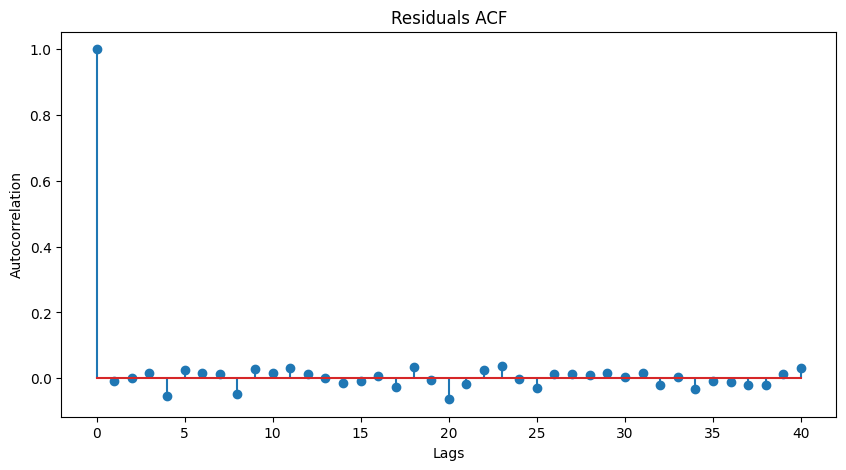

In [7]:
acf_values = acf(df['Erros'], nlags=40)
plt.figure(figsize=(10, 5))
plt.stem(range(len(acf_values)), acf_values)
plt.title('Residuals ACF')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Teste de Ljung-Box

In [8]:
lb_test = acorr_ljungbox(df['Erros'], lags=[10], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
10  7.710808   0.657061


Com base nos resultados do teste de Ljung-Box (p=0.65 > 0.05), **podemos concluir que os erros do modelo não apresentam autocorrelação significativa, o que é um sinal positivo de que o modelo está bem ajustado**, uma vez que resíduos independentes são uma das características desejáveis em muitos modelos de séries temporais.

# 4. Teste de Estacionaridade (ADF)

In [9]:
adf_test = adfuller(df['Erros'])
print(f"ADF Test: p-value={adf_test[1]:.4f}")

ADF Test: p-value=0.0000


O resultado do teste ADF indica que a série temporal dos erros é estacionária (p=0<0.05), ou seja, as suas propriedades estatísticas, como média e variância, não mudam ao longo do tempo. Isso é um sinal importante de que o modelo de séries temporais pode estar bem ajustado.

# 5. Outliers nos Resíduos

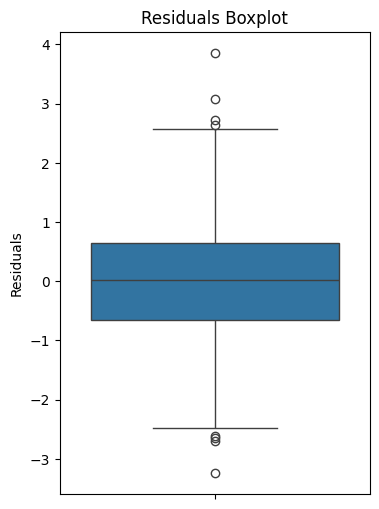

In [10]:
plt.figure(figsize=(4, 6))
sns.boxplot(df['Erros'])
plt.ylabel('Residuals')
plt.title('Residuals Boxplot')
plt.show()

**Comentário:** 

# 6. Teste de Normalidade QQ-Plot

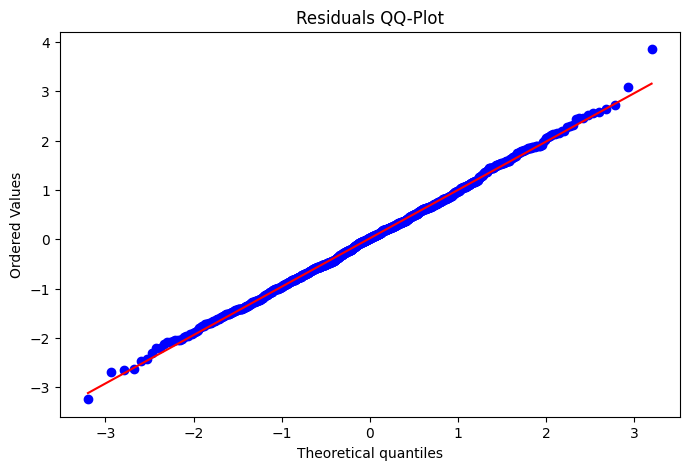

In [11]:
plt.figure(figsize=(8, 5))
stats.probplot(df['Erros'], dist="norm", plot=plt)
plt.title('Residuals QQ-Plot')
plt.show()

A maior parte dos erros parece seguir uma distribuição normal, o que é um bom sinal para a suposição de normalidade dos resíduos, necessária para muitos modelos.

No entanto, os outliers nos extremos indicam que pode haver alguns pontos com comportamento não esperado.

Estes resultados estão em linha com o teste de Shapiro-Wilk (p-value=0.6265), que também indicou que os resíduos podem ser considerados normalmente distribuídos.

# Portfolio Analysis

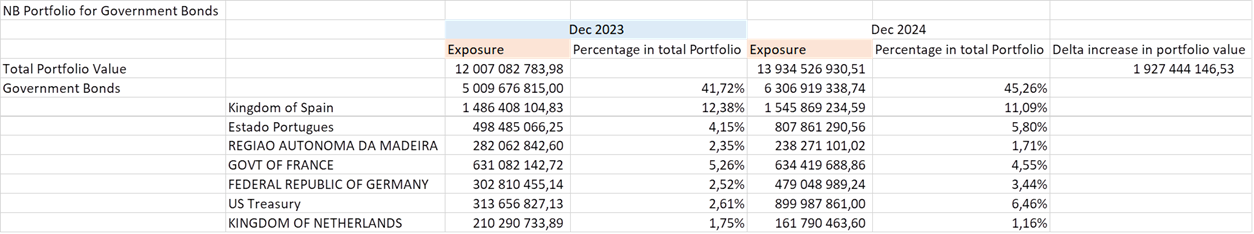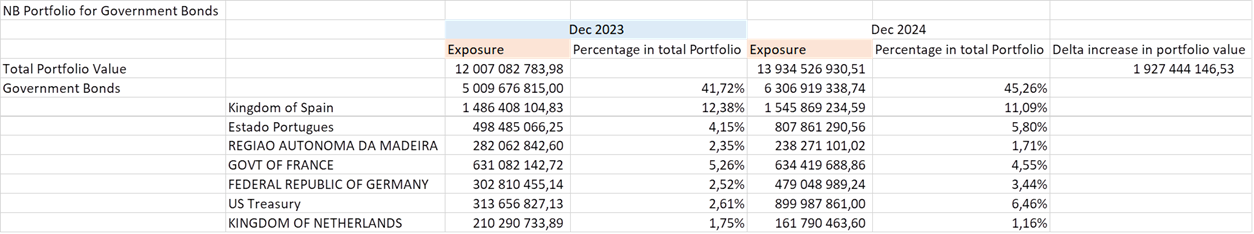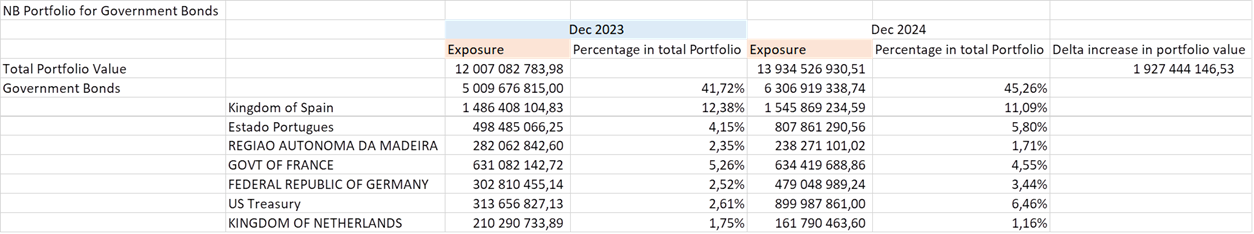

In [12]:
df_pt = pd.read_excel('portfolio_analysis.xlsx', sheet_name='Portugal 10-Year Bond Yield His')[['Date', 'Price']].set_index('Date')
df_pt

,Price
Date,
2024-04-09 00:00:00,2.820
2024-03-09 00:00:00,2.898
2024-02-09 00:00:00,2.932
08/30/2024,2.897
08/29/2024,2.887
...,...
2007-12-01 00:00:00,4.212
2007-11-01 00:00:00,4.163
2007-10-01 00:00:00,4.172


In [13]:
df_pt['Daily Return'] = (df_pt['Price'] - df_pt['Price'].shift(-1)) / df_pt['Price'].shift(-1)
df_pt['10-Day Return'] = (df_pt['Price'] - df_pt['Price'].shift(-10)) / df_pt['Price'].shift(-10)

In [14]:
df_pt[['Daily Return', '10-Day Return']].quantile(0.01)

Daily Return    -0.205966
10-Day Return   -0.509176
Name: 0.01, dtype: float64

In [15]:
df_pt = df_pt.reset_index()
df_pt['Date'] = pd.to_datetime(df_pt['Date'])

## PLOTS (Fazer para cada país)

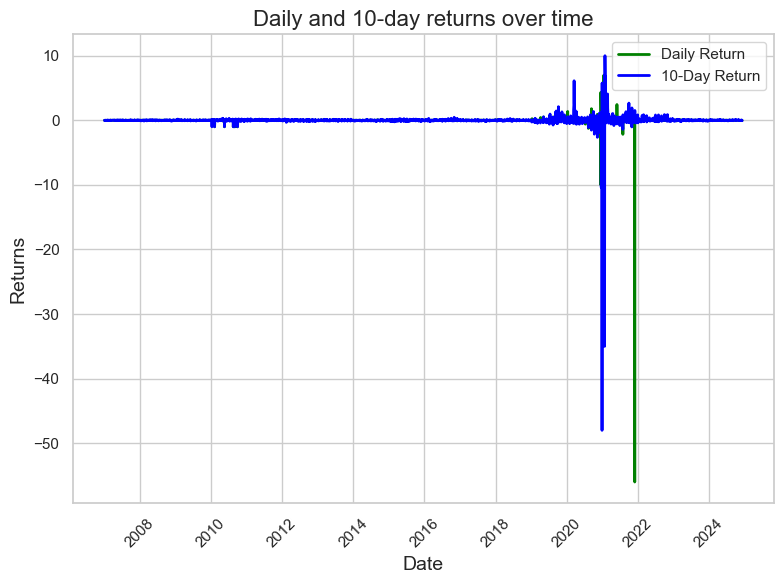

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.lineplot(x=df_pt['Date'], y=df_pt['Daily Return'], label='Daily Return', color='green', linewidth=2)
sns.lineplot(x=df_pt['Date'], y=df_pt['10-Day Return'], label='10-Day Return', color='blue', linewidth=2)

plt.title('Daily and 10-day returns over time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

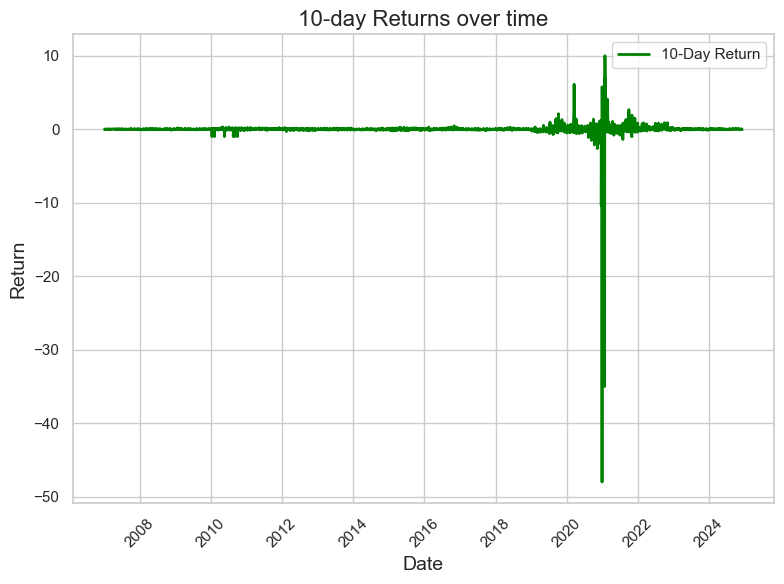

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.lineplot(x=df_pt['Date'], y=df_pt['10-Day Return'], label='10-Day Return', color='green', linewidth=2)

plt.title('10-day Returns over time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

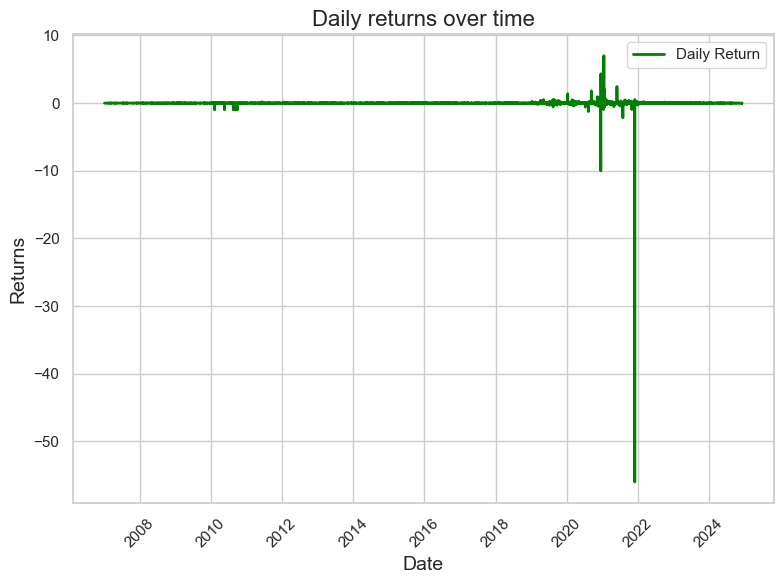

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.lineplot(x=df_pt['Date'], y=df_pt['Daily Return'], label='Daily Return', color='green', linewidth=2)

plt.title('Daily returns over time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
df_ptx = df_pt[df_pt['Date'] > '31-12-2022']

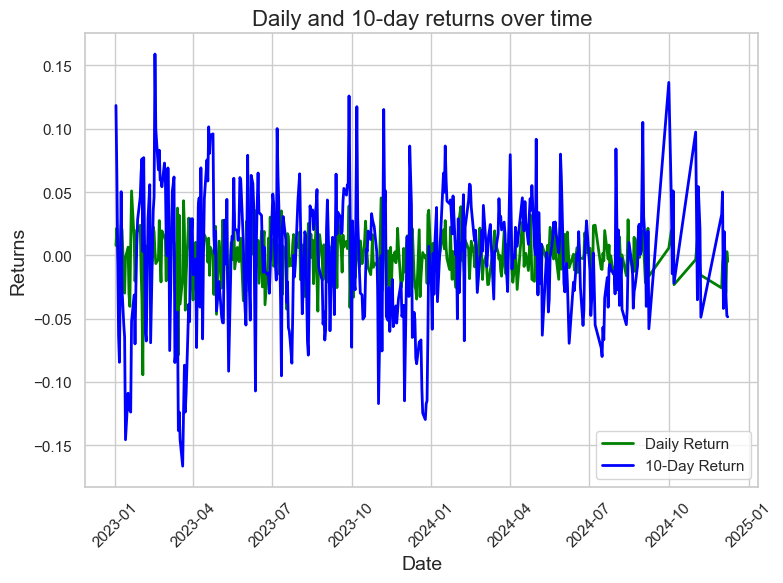

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.lineplot(x=df_ptx['Date'], y=df_ptx['Daily Return'], label='Daily Return', color='green', linewidth=2)
sns.lineplot(x=df_ptx['Date'], y=df_ptx['10-Day Return'], label='10-Day Return', color='blue', linewidth=2)

plt.title('Daily and 10-day returns over time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

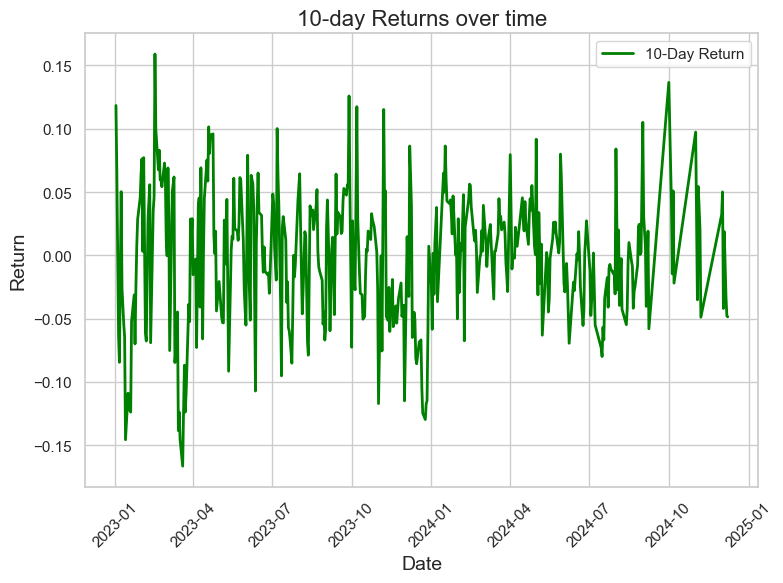

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.lineplot(x=df_ptx['Date'], y=df_ptx['10-Day Return'], label='10-Day Return', color='green', linewidth=2)

plt.title('10-day Returns over time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

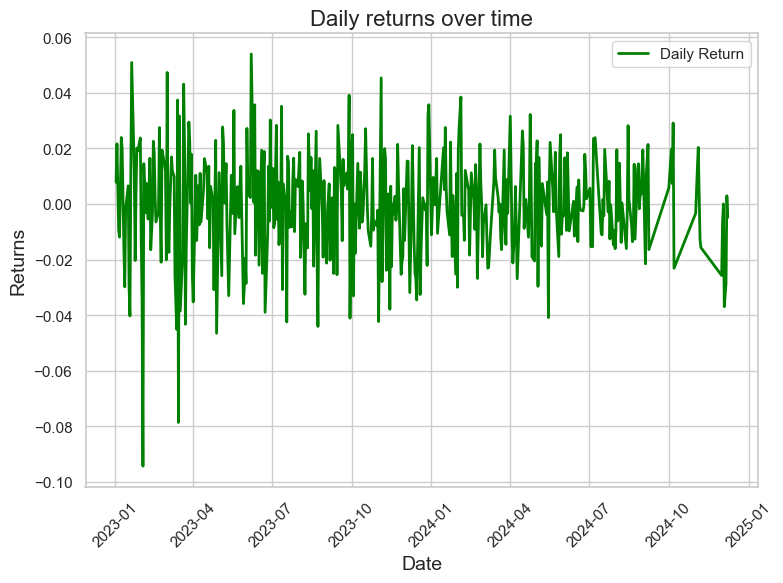

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.lineplot(x=df_ptx['Date'], y=df_ptx['Daily Return'], label='Daily Return', color='green', linewidth=2)

plt.title('Daily returns over time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Returns', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlations

In [23]:
df_prices = pd.read_excel('portfolio_analysis.xlsx' ,sheet_name='Quick Correlation metrics')[['Date', 'Spain', 'PT', 'Germany', 'France']].dropna() 

In [24]:
df_prices

,Date,Spain,PT,Germany,France
0,09/24/2024,2.931,2.820,2.136,2.914
1,09/23/2024,2.964,2.898,2.175,2.947
2,09/20/2024,3.003,2.932,2.221,2.964
3,09/19/2024,2.993,2.897,2.192,2.930
4,09/18/2024,3.002,2.887,2.191,2.918
...,...,...,...,...,...
4738,10/22/2007,4.279,4.241,4.028,4.718
4739,10/19/2007,4.304,4.276,4.018,4.665
4740,10/18/2007,4.409,4.295,4.015,4.620
4741,10/17/2007,4.464,4.165,3.973,4.546


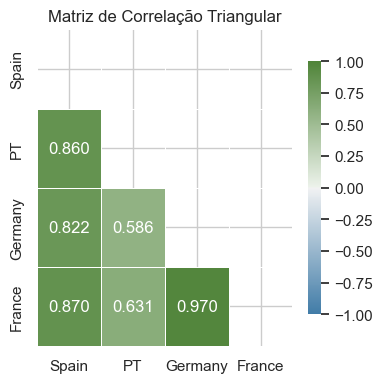

In [25]:
corr = df_prices.drop(columns=['Date']).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(240, 120, as_cmap=True) 

plt.figure(figsize=(4, 4))
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, fmt='.3f', linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação Triangular', fontsize=12)
plt.tight_layout()
plt.show()